# NLP Lesson-01 Assignment

## 1. 复现课堂代码

### 语法生成树

在本小节中，用类似汇编语言的语法生成树来生成一个完整的句子。

In [8]:
 import random

In [2]:
hello_rules = '''
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | 老梁 | 老刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
'''

In [19]:
def generate(grammar_rule, target):
    """递归生成字符串拼接句子
    
    grammar_rule: 语法生成树的字典形式
    target: 需要查找的 key (statement / expression)
    """
    if target in grammar_rule:  # 如果是 statement 则取 expression
        candidates = grammar_rule[target]  # ['name names', 'name']
        candidate = random.choice(candidates)  #'name names', 'name'
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [20]:
def get_generation_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):
    """基于 grammar_str 产生句子
    
    grammar_str: 语法生成树
    stmt_split: 行内 statement 和  expression 的分隔符
    or_split: expression 不同取值的分隔符
    """
    rules = dict() # key is the @statement, value is @expression
    for line in grammar_str.split('\n'):
        if not line: continue  # skip the empty line
            
        stmt, expr = line.split(stmt_split)
    
        rules[stmt.strip()] = expr.split(or_split)
    
    # 将语法生成树转换成字典形式
    generated = generate(rules, target=target)
    
    return generated

In [21]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的"""

In [22]:
# 存在的问题：符合生成的 Adj 或 name 会重复，且此时主语宾语与现实世界表述有差异
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

'一个好看的好看的桌子看着一个小小的好看的好看的蓝色的好看的蓝色的篮球'

In [1]:
get_generation_by_gram(hello_rules, target='say_hello', stmt_split='=')

NameError: name 'get_generation_by_gram' is not defined

In [24]:
simpel_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''

In [25]:
for i in range(20):
    print(get_generation_by_gram(simpel_programming, target='if_stmt', stmt_split='=>'))

if(0201<=a){a=30c0}
if(2c){if(2a0b32b>=2){d=1}}
if(cada33==00){if(d3<c){3d1=0}}
if(3<3){ab10=a}
if(bba==2dd){0=1}
if(a<=b){1=1}
if(1<=3){if(c0<=d32){if(ab>=3){if(33==10b){if(bc<d3){if(3==22ca){if(1a){a=a}}}}}}}
if(1==c02a){if(112){a2=a}}
if(b<=33c0){a=b1}
if(bac3>=a){ab=a}
if(c==d){if(add<=1){if(ddd20){if(a<b){if(b>=1){dd=1cd}}}}}
if(023){0=c1}
if(0==0cb){1=3}
if(2<=0){b1=31}
if(01c>=1ad1){if(3==dd){1cb0a=01}}
if(2ba){if(01>=0){1b=11}}
if(a30){c31dc0=3}
if(add){if(22<0){1=d}}
if(1==3){b31=c}
if(da>=1aa1b){dd0c=b}


### 统计语言模型 n-gram

**1-gram (Unigram)**
$$P(w_i)=\frac{C(W_i)}{\sum_{\forall k}C(W_k)}=\frac{C(w_i)}{N}$$
**2-gram (Bigram)**
$$P(w_{i+1}|w_i)=\frac{C(w_i, w_{i+1})}{\sum_{\forall k}C(w_i,w_k)}=\frac{C(w_i,w_{i+1})}{C(w_i)}$$

$$ Pr(sentence) = Pr(w_1 \cdot w_2 \cdots w_n) = \prod \frac{count(w_i, w_{i+1})}{count(w_i)}$$

In [31]:
corpus = './article_9k.txt'

In [32]:
FILE = open(corpus, encoding="utf-8").read()  # 加载本体语料库文件

In [33]:
len(FILE)

33425826

In [34]:
FILE[:500]

'此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息\n骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台\n此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄'

In [36]:
import jieba
from collections import Counter

In [38]:
max_length = 1000000 

sub_file = FILE[:max_length]

In [37]:
def cut(string):
    return list(jieba.cut(string))

In [39]:
TOKENS = cut(sub_file)  # 结巴分词后，句子被切断为每个 token

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\75253\AppData\Local\Temp\jieba.cache
Loading model cost 1.289 seconds.
Prefix dict has been built succesfully.


In [40]:
len(TOKENS)

532454

In [41]:
%matplotlib inline

In [44]:
words_count = Counter(TOKENS)  # 将 TOKENS 用 Counter 表示，(token: 出现频率)

In [45]:
words_count.most_common(20)

[('的', 28764),
 ('在', 7563),
 ('了', 6529),
 ('是', 4883),
 ('和', 4245),
 ('也', 2531),
 ('月', 2433),
 ('有', 2374),
 ('将', 2114),
 ('他', 1960),
 ('年', 1959),
 ('对', 1795),
 ('都', 1720),
 ('中', 1699),
 ('为', 1686),
 ('日', 1674),
 ('等', 1655),
 ('与', 1601),
 ('中国', 1597),
 ('上', 1583)]

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
words_with_fre = [f for w, f in words_count.most_common()]
words_with_fre[:10]  # 词频

[28764, 7563, 6529, 4883, 4245, 2531, 2433, 2374, 2114, 1960]

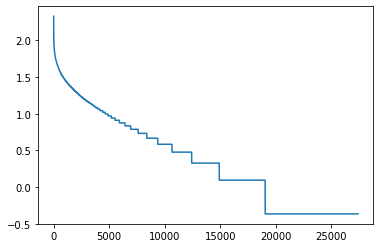

In [49]:
plt.plot(np.log(np.log(words_with_fre)))

在大量的文本中，出现次数第二多的单词，它出现的概率是，
出现频率最高的单词的 1/2, 出现频率第三高的单词，频率是最高的
单词的 1/3， 1000 => 1/1000

In [53]:
words_count.most_common()[-1][-1]

1

In [54]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]
_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [55]:
_2_gram_word_counts = Counter(_2_gram_words)

In [56]:
def get_gram_count(word, wc):
    if word in wc: return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [57]:
def two_gram_model(sentence):
    # 2-gram langauge model
    tokens = cut(sentence)
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        
        probability *= pro
    
    return probability  

In [58]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

3.0550026391456175e-26

In [60]:
two_gram_model('其余机型已暂停更新')

2.607416974889427e-08

In [61]:
two_gram_model('国庆快乐')

0.03571428571428571

In [62]:
two_gram_model('人是其信念的集合')

7.052348618071535e-11

In [68]:
two_gram_model('马云很穷')

1.0

In [69]:
two_gram_model('马云有钱')

0.16666666666666666